<a href="https://colab.research.google.com/github/Viktory4121/MM/blob/main/%D0%98%D0%94%D0%972.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ИДЗ 2. Вынужденные колебания материальной точки.
###Вариант 8 + 9.

Задание:
В начальный момент времени груз массой m1, прикрепленный к вязкоупругой подвеске (обобщающая схема динамической системы изображена на рис. 2.2, а), находится в покое в гравитационном поле. В начальный момент
времени t = 0 ему сообщается скорость v0, направленная вверх/вниз (см. варианты) и одновременно присоединяется масса m2 либо отсоединяется масса m3. Начальные возмущения вызывают колебательный процесс, который требуется описать и проанализировать.
Требуется:
- привести исходные данные анализируемой системы к эквивалентной
схеме (см. рис.2.1, рис. 2.2);
- направляя ось координат x вниз и выбирая начало отсчета в положении
равновесия колеблющегося груза, записать уравнение движения;
- сформулировать начальные условия для центра масс груза;
- построить частное решение задачи Коши; 
- построить амплитудно-частотную характеристику при номинальном
значении параметра вязкости µ, а также при значениях, отличающихся в десять раз в обе стороны, провести анализ и дать комментарии.

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.animation import FuncAnimation
import pylab
%matplotlib inline

from matplotlib import rc
rc('animation', html='jshtml')
import IPython.display as dis

In [17]:
#Вариант 8:
#Жёсткость пружины (Н/см):
c1 = 0.2
c2 = 0.25
c3 = 0.0

#Вариант 9:
#Масса груза (кг):
m1 = 3.0
m2 = 1.0
m3 = 0.0
#Коэффициент вязкости среды (кг/с):
mu = 1.2
#Скорость (м/с):
v0 = 1.0
#Направление - вверх
#Частота вынужденных колебаний (шт.):
omega = 12.0

#Ускорение свободного падения:
g = 9.81
#Амплитуда:
ksi0 = 0.07

In [130]:
#Так как расположение 1 и 2 пружин - параллельно, то:
c = c1 + c2
#пружины 1 и 2 по отношению к 3 располагаются последовательно, тогда:
#c = (c_eq * c3) / (c_eq + c3)
print("c = ", c)

#Аналогичным образом можно расчитать массу:
m = m1 + m2 + m3
print("m = ", m)

#Статическое удлинение пружины:
lambda_st = m * g / c
print("lambda_st = ", lambda_st)

#Параметр, отвечающий за затухание колебаний:
b = mu / (2.0 * m)
print("b = ", b)

#частота собственных колебаний:
k = c / m
print("k = ", k)

#амплитудное значение ускорения, вызванного возбуждением:
a0 = (ksi0 * c) / m
print("a0 = ", a0)

c =  0.45
m =  4.0
lambda_st =  87.2
b =  0.15
k =  0.1125
a0 =  0.007875000000000002


In [19]:
print("Утверждение, что в системе низкий уровень вязкости: ", (b**2 - k**2) < 0)
#если true, то в системе происходят собственные колебания (низкий уровень вязкости)
#если false, то при высокой вязкости среды, собственное движение представляет собой апериодический процесс

Утверждение, что в системе низкий уровень вязкости:  False


In [20]:
delta = (k**2 - b**2)**2 + 4 * (b**2) * (omega**2)
print("delta = ", delta)

alpha = a0 * 2 * b * omega / delta
print("alpha = ", alpha)

beta = a0 * (k**2 - b**2) / delta
print("beta = ", beta)

#C, psi0 - неопределенные константы интегрирования
#phi0 - начальная фаза вынужденных колебаний

delta =  12.960096899414062
alpha =  0.0021874836446077604
beta =  -5.981400590724344e-06


In [21]:
#амплитуда вынужденных колебаний, зависящая от частот собственных и вынужденных колебаний
A = a0 / math.sqrt(delta)

In [34]:
#animation = FuncAnimation(
    #fig,                # фигура, где отображается анимация
    #func=update_cos,    # функция обновления текущего кадра
    #frames=phasa,       # параметр, меняющийся от кадра к кадру
    #fargs=(line, x),    # дополнительные параметры для функции update_cos
    #interval=30,       # задержка между кадрами в мс
    #blit=True,          # использовать ли двойную буферизацию
    #repeat=False)       # зацикливать ли анимацию

In [133]:
phi0 = 0.01
psi0 = 0.1
cc = 1
def init():
    line.set_data([], [])
    return line,

In [143]:
#@title
#dis.display(anim)

#fig, ax = plt.subplots()
#ax = plt.axes(xlim=(0, 0.3), ylim=(0, 5))
#ax.set_xlabel('t')
#ax.set_ylabel('x')
#ax.set_title("Изменяющиеся значения частоты")
#line, = ax.plot([], [], lw=3)

def animate1(j):
  t = []
  t = [i for i in range(0,101,1)]
  x = []
  for i in t:
    x.append(cc * math.exp(-b*i) * math.sin(math.sqrt(abs(k**2 - b**2)) + psi0) + A * math.sin(j * i + phi0))
  line.set_data(x, t)
  return line,

#anim = FuncAnimation(fig, animate1, init_func=init, frames=100, interval=30, blit=True, repeat=True)
#anim

In [98]:
t = [i for i in range(0,101,1)]
def fun(tt, oomega, psi, phi, cc, n_color, message, b=b, A=A, k=k):
  xx = []
  for i in tt:
    xx.append(cc * math.exp(-b*i) * math.sin(math.sqrt(abs(k**2 - b**2)) + psi) + A * math.sin(oomega * i + phi))
  plt.plot(tt, xx, color = n_color, label=message)

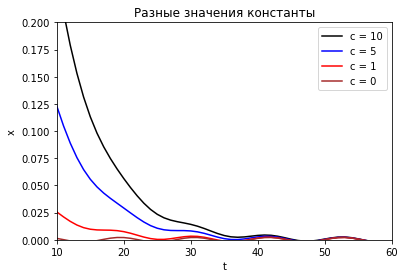

In [123]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(10, 60), ylim=(0, 0.2))
ax.set_title("Разные значения константы")
ax.set_xlabel('t')
ax.set_ylabel('x')
fun(t, omega, 0.01, 0.01, 10, "black", "с = 10")
fun(t, omega, 0.01, 0.01, 5, "blue", "с = 5")
fun(t, omega, 0.01, 0.01, 1, "red", "с = 1")
fun(t, omega, 0.01, 0.01, 0, "brown", "с = 0")
ax.legend()

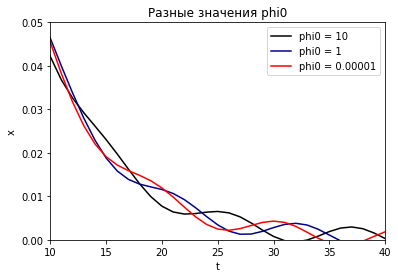

In [118]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(10, 40), ylim=(0, 0.05))
ax.set_title("Разные значения phi0")
ax.set_xlabel('t')
ax.set_ylabel('x')
fun(t, omega, 0.1, 10, 1, "black", "phi0 = 10")
fun(t, omega, 0.1, 1, 1, "darkblue", "phi0 = 1")
fun(t, omega, 0.1, 0.00001, 1, "red", "phi0 = 0.00001")
ax.legend()

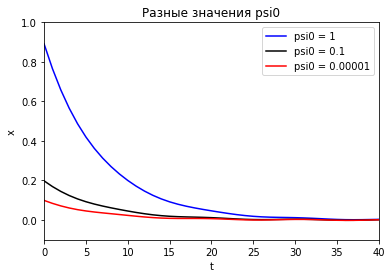

In [110]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 40), ylim=(-0.1, 1))
ax.set_title("Разные значения psi0")
ax.set_xlabel('t')
ax.set_ylabel('x')
fun(t, omega, 1, 0.1, 1, "blue", "psi0 = 1")
fun(t, omega, 0.1, 0.1, 1, "black", "psi0 = 0.1")
fun(t, omega, 0.00001, 0.1, 1, "red", "psi0 = 0.00001")
ax.legend()

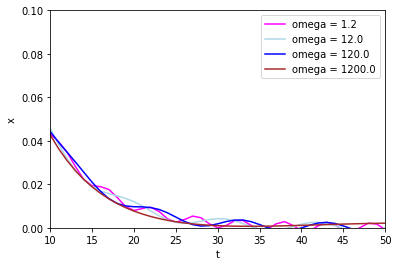

In [91]:
fig, ax = plt.subplots()
ax.set_title("Разные значения omega")
ax = plt.axes(xlim=(10, 50.0), ylim=(0, 0.1))
ax.set_xlabel('t')
ax.set_ylabel('x')
#fun(t, 0, 0.1, 0.1, 1, "black", "omega = 0")
#fun(t, 1, 0.1, 0.1, 1, "darkblue", "omega = 1")
fun(t, omega / 10.0, 0.1, 0.1, 1, "magenta", "omega = " + str(omega/10))
fun(t, omega, 0.1, 0.1, 1, "lightblue", "omega = " + str(omega))
fun(t, omega * 10.0, 0.1, 0.1, 1, "blue", "omega = " + str(omega*10))
fun(t, omega * 100.0, 0.1, 0.1, 1, "brown", "omega = " + str(omega*100))
ax.legend()